In [36]:
import numpy as np
from tqdm import tqdm
from scipy.stats import norm
from typing import *
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

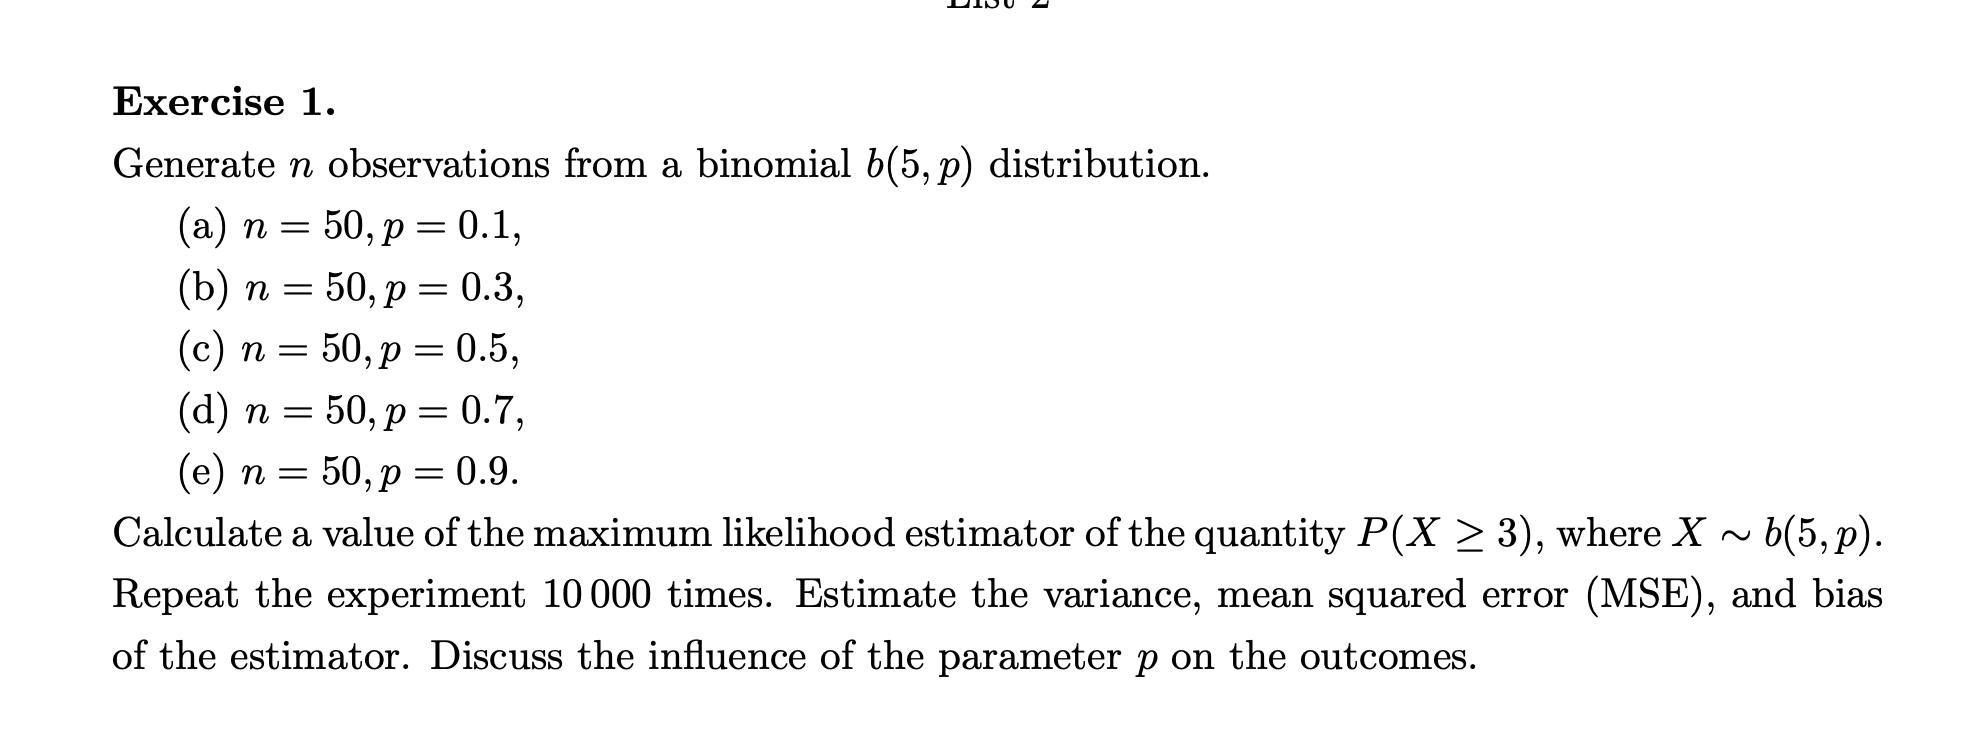

In [39]:
for p in (0.1, 0.3, 0.5, 0.7, 0.9):
    p_hats = []
    Ps = []
    for _ in range(10000):
        X = np.random.binomial(n=5, p=p, size=50)

        # Calculate MLE p_hat
        p_hat = X.mean() / 5
        
        # Calculate P(x >= 3)
        P = 1 - binom.cdf(k=2, n=5, p=p_hat)  
        
        Ps.append(P)
        p_hats.append(p_hat)
    
    p_hats = np.array(p_hats)
    print(
        f'True p = {p}, '
        f'mean p_hat = {np.mean(p_hats):3f}, '
        f'var p_hat = {np.var(p_hats):.3f}, '
        f'MSE p_hat = {np.square(np.mean((p_hats - p) ** 2)):.3f}, '
        f'bias p_hat = {np.mean(p_hats - p):.3f}, '
        f'mean P = {np.mean(Ps):.3f}'
        )

True p = 0.1, mean p_hat = 0.099866, var p_hat = 0.000, MSE p_hat = 13.329, bias p_hat = -0.000, mean P = 0.009
True p = 0.3, mean p_hat = 0.300268, var p_hat = 0.001, MSE p_hat = 72.331, bias p_hat = 0.000, mean P = 0.166
True p = 0.5, mean p_hat = 0.499850, var p_hat = 0.001, MSE p_hat = 98.224, bias p_hat = -0.000, mean P = 0.500
True p = 0.7, mean p_hat = 0.699917, var p_hat = 0.001, MSE p_hat = 72.837, bias p_hat = -0.000, mean P = 0.835
True p = 0.9, mean p_hat = 0.899987, var p_hat = 0.000, MSE p_hat = 12.611, bias p_hat = -0.000, mean P = 0.991


# TODO
Table should be for P(x >= 3) not p_hat

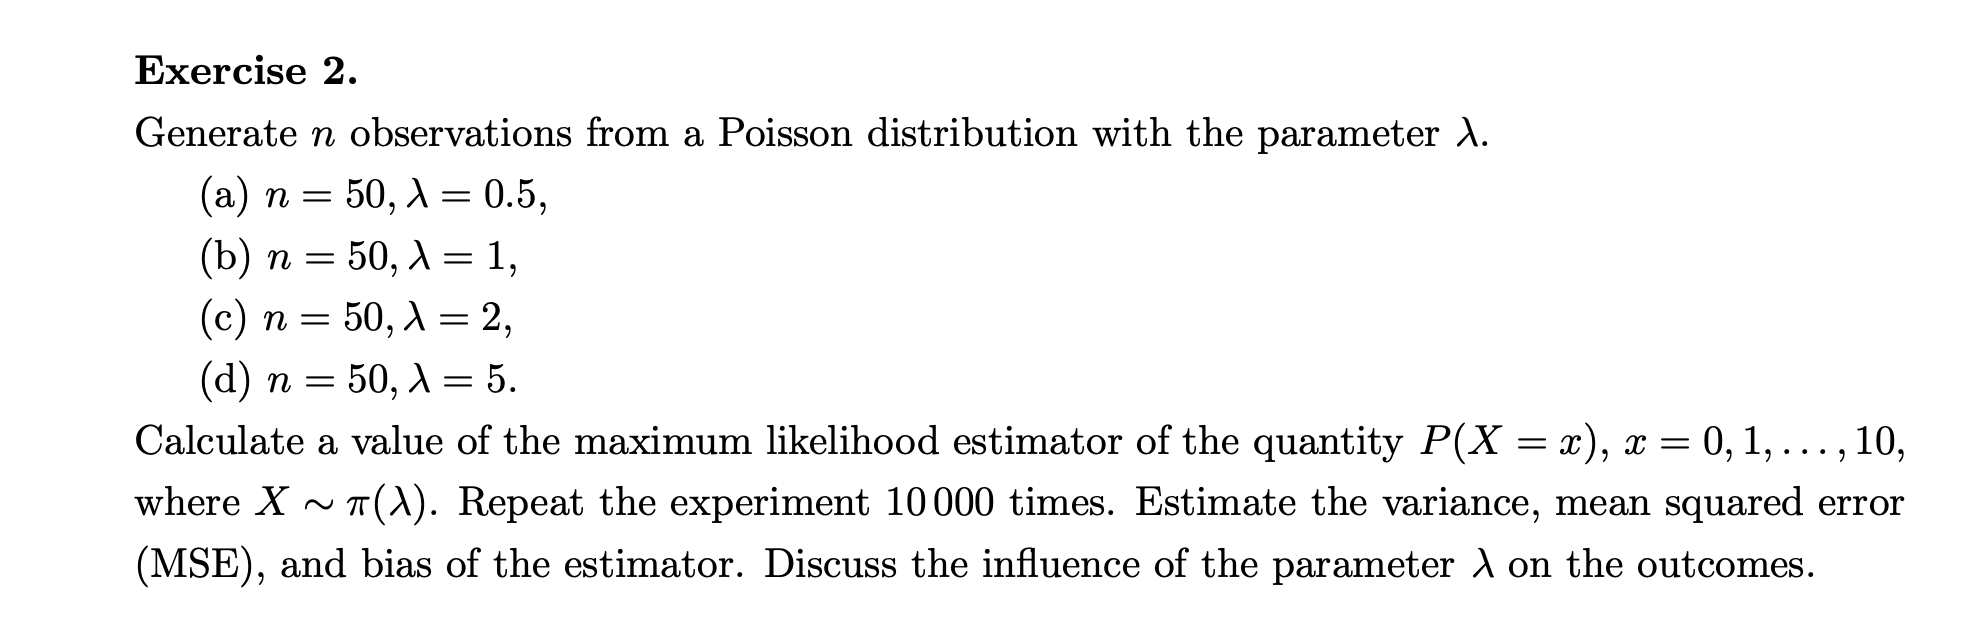

In [59]:
for lam in (0.5, 1, 2, 5):
    lam_hats = []
    Ps = []
    for _ in range(10000):
        X = np.random.poisson(lam=lam, size=50)

        # Calculate MLE p_hat
        lam_hat = X.mean()
        
        # Calculate P(x >= 3)
        P = poisson.pmf(k=0, mu=lam_hat)  
        
        Ps.append(P)
        lam_hats.append(lam_hat)
    
    lam_hats = np.array(lam_hats)
    print(
        f'True lambda = {lam}, '
        f'mean lam_hat = {np.mean(lam_hats):3f}, '
        f'var lam_hat = {np.var(lam_hats):.3f}, '
        f'MSE lam_hat = {np.square(np.mean((lam_hats - lam) ** 2)):.3f}, '
        f'bias lam_hat = {np.mean(lam_hats - lam):.3f}, '
        f'mean P = {np.mean(Ps):.3f}'
    )

True lambda = 0.5, mean lam_hat = 0.497862, var lam_hat = 0.010, MSE lam_hat = 9681.694, bias lam_hat = -0.002, mean P = 0.611
True lambda = 1, mean lam_hat = 0.996778, var lam_hat = 0.020, MSE lam_hat = 39453.559, bias lam_hat = -0.003, mean P = 0.373
True lambda = 2, mean lam_hat = 1.996730, var lam_hat = 0.039, MSE lam_hat = 154889.788, bias lam_hat = -0.003, mean P = 0.138
True lambda = 5, mean lam_hat = 4.999314, var lam_hat = 0.100, MSE lam_hat = 991210.599, bias lam_hat = -0.001, mean P = 0.007


# TODO

One table 3 x 11 for one selected lambda and discuss for other lambdas

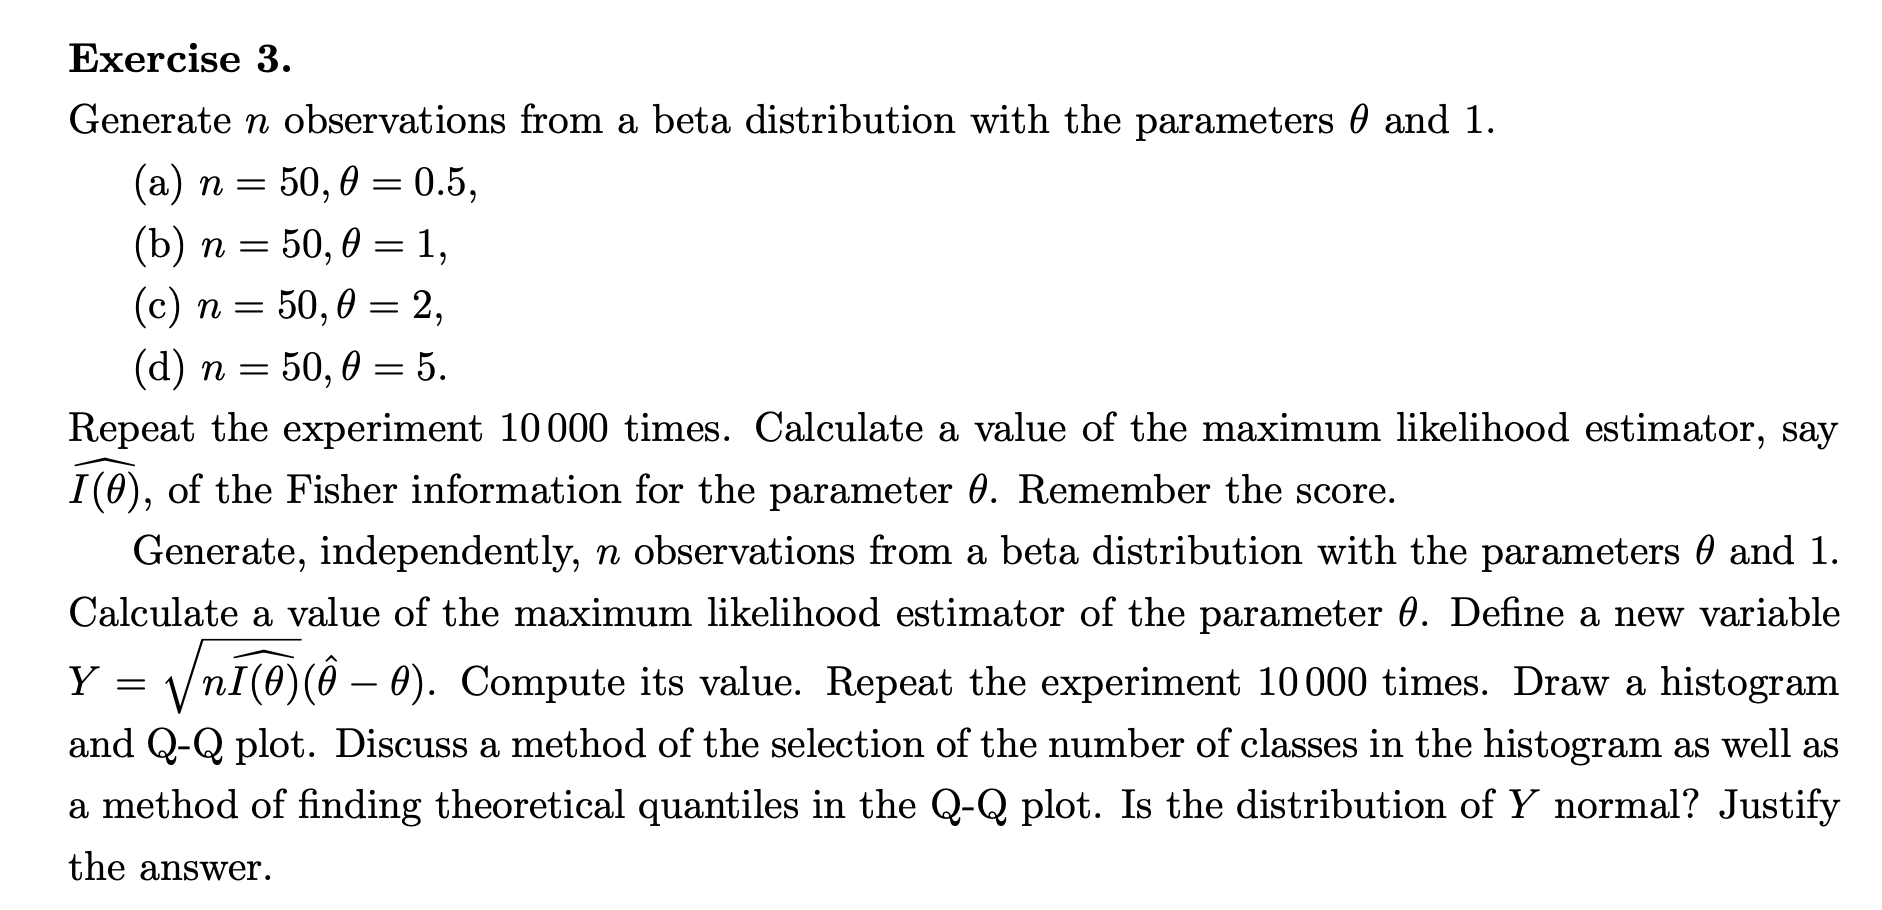

In [67]:
import statsmodels.api as sm

True alpha = 0.5, mean alpha_hat = 0.510779, var alpha_hat = 0.005, MSE alpha_hat = 0.000, bias alpha_hat = 0.011, mean P = 4.073, mean Y = 0.007


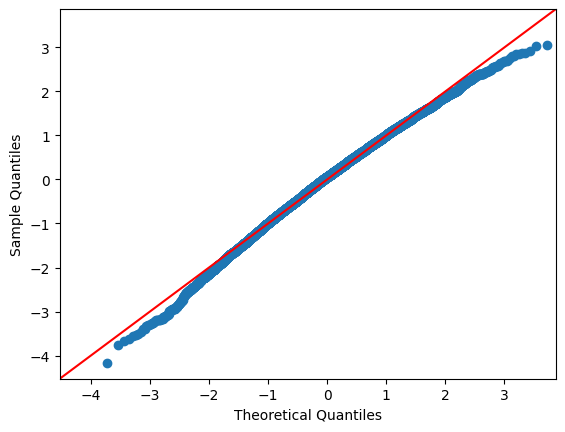

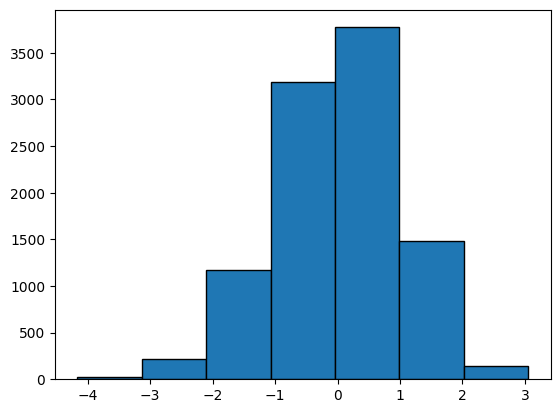

True alpha = 1, mean alpha_hat = 1.018482, var alpha_hat = 0.022, MSE alpha_hat = 0.000, bias alpha_hat = 0.018, mean P = 1.024, mean Y = -0.014


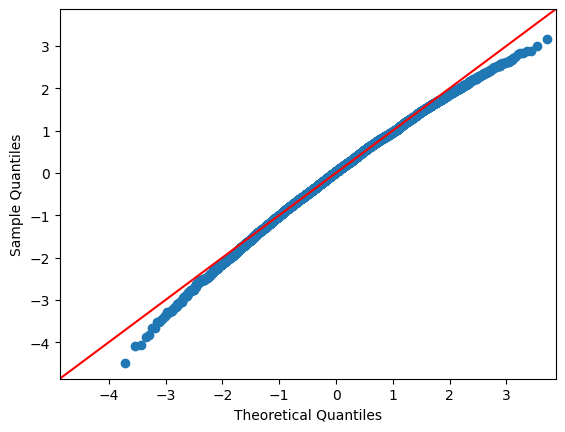

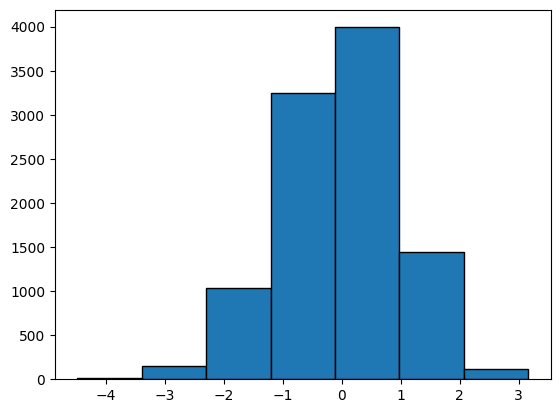

True alpha = 2, mean alpha_hat = 2.043676, var alpha_hat = 0.089, MSE alpha_hat = 0.008, bias alpha_hat = 0.044, mean P = 0.254, mean Y = 0.007


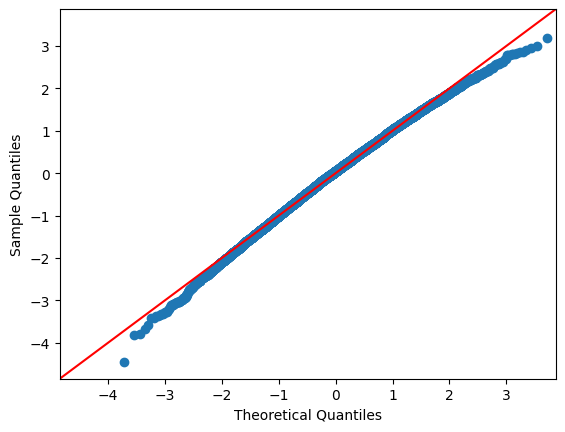

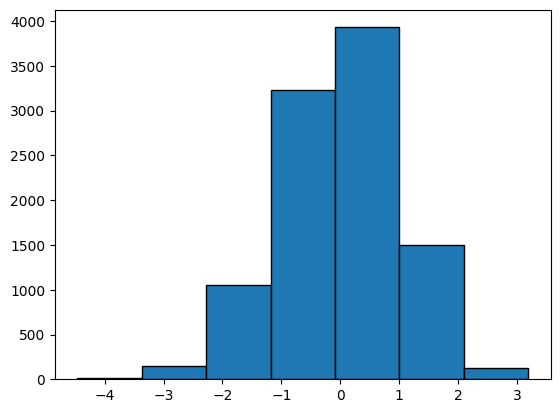

True alpha = 5, mean alpha_hat = 5.096335, var alpha_hat = 0.555, MSE alpha_hat = 0.318, bias alpha_hat = 0.096, mean P = 0.041, mean Y = -0.011


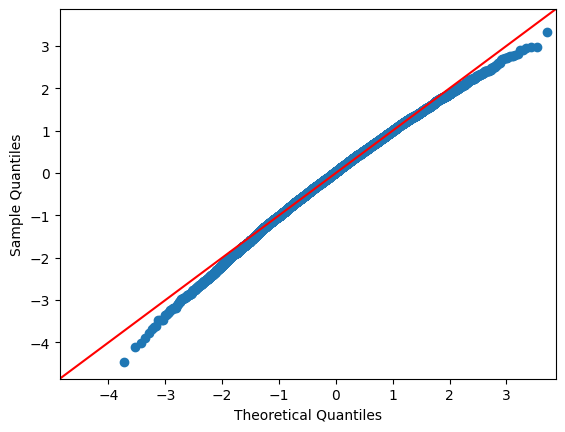

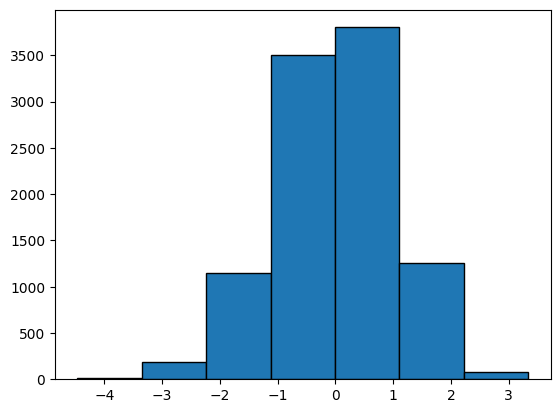

In [82]:
for alpha in (0.5, 1, 2, 5):
    alpha_hats = []
    fisher_information = []
    Ys = []
    for _ in range(10000):
        X = np.random.beta(a=alpha, b=1, size=50)

        # Calculate MLE p_hat
        alpha_hat = -50 / np.sum(np.log(X)) 
        
        fisher = 1 / (alpha_hat ** 2)
        
        Y = np.sqrt(50 * fisher) * (alpha_hat - alpha)
        Ys.append(Y)

        fisher_information.append(fisher)
        alpha_hats.append(alpha_hat)
    
    alpha_hats = np.array(alpha_hats)
    print(
        f'True alpha = {alpha}, '
        f'mean alpha_hat = {np.mean(alpha_hats):3f}, '
        f'var alpha_hat = {np.var(alpha_hats):.3f}, '
        f'MSE alpha_hat = {np.square(np.mean((alpha_hats - alpha) ** 2)):.3f}, '
        f'bias alpha_hat = {np.mean(alpha_hats - alpha):.3f}, '
        f'mean P = {np.mean(fisher_information):.3f}, '
        f'mean Y = {np.mean(Ys):.3f}'
    )
    plot = sm.qqplot(np.array(Ys), line='45')
    plt.show()
    plt.hist(Ys, bins=int(np.sqrt(50)), edgecolor='black')
    plt.show()

## TODO

Do a shapino test for normality of Y

With more samples the p-value should go higher, therefore the sample becomes normal.

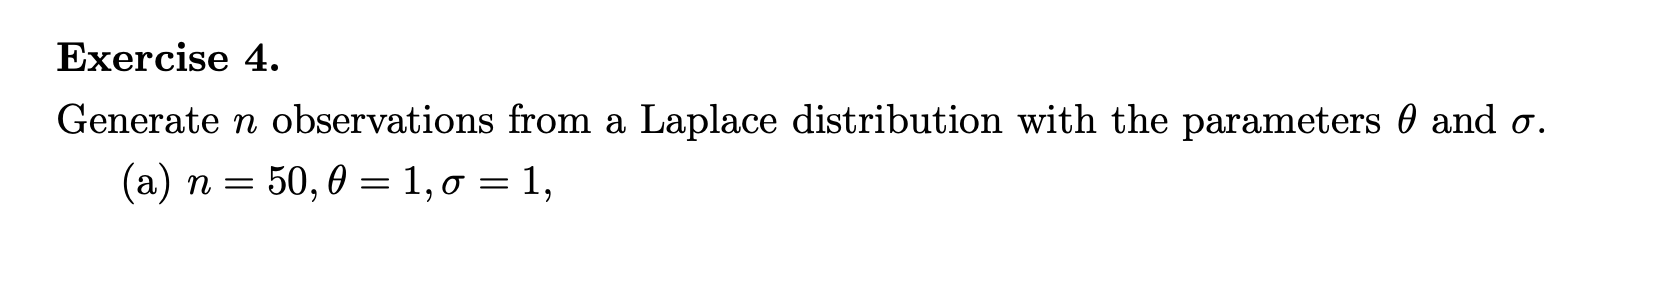
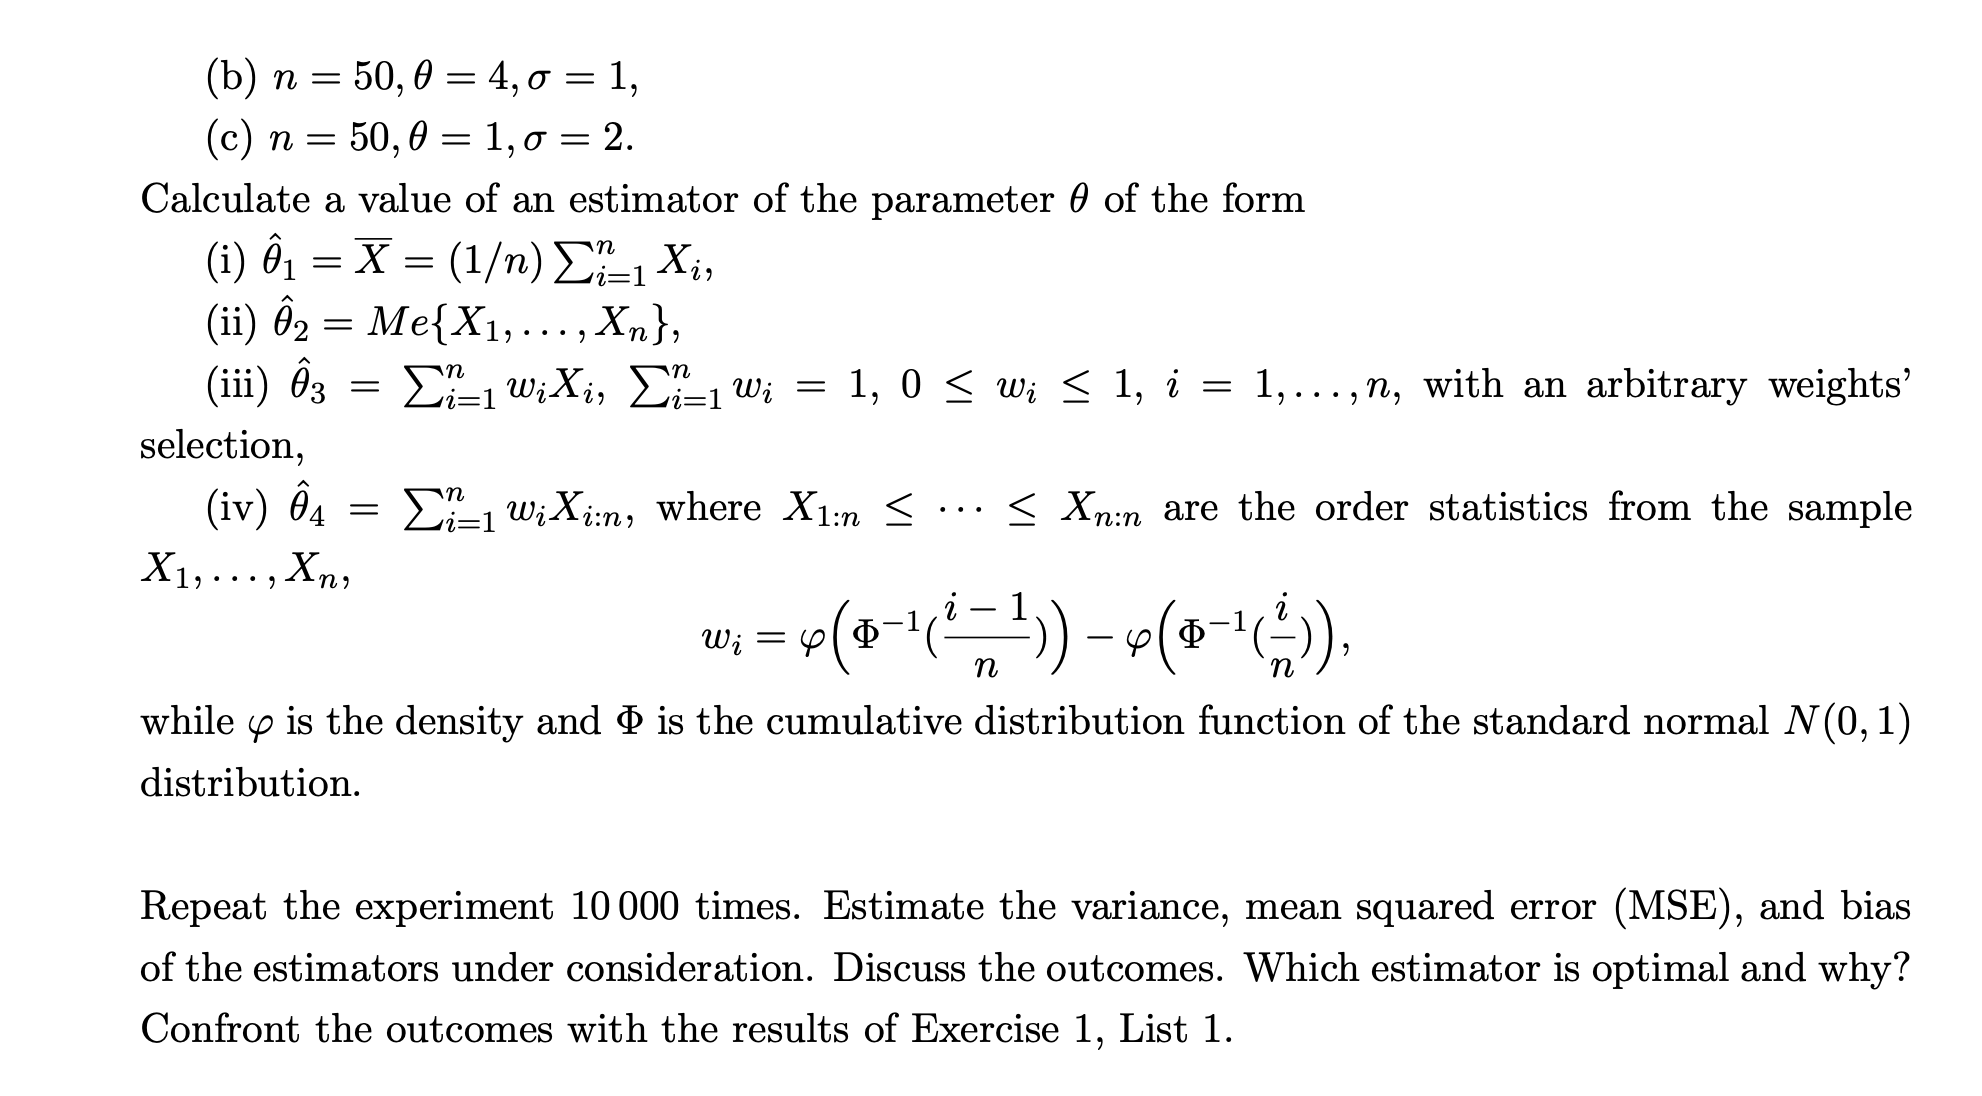

In [92]:
Thetas = [1, 4, 1]
Sigmas = [1, 1, 2]
W = np.random.uniform(0, 1, size=50)
W /= sum(W)

W2 = np.array([
    norm.pdf(norm.ppf((i - 1) / 50)) - norm.pdf(norm.ppf(i / 50)) 
    for i in range(1, 51)
])

print(W2)
print(sum(W2))

for theta, sigma in zip(Thetas, Sigmas):
    theta_hats_1 = []
    theta_hats_2 = []
    theta_hats_3 = []
    theta_hats_4 = []
    for _ in range(10000):
        X = np.array(sorted(np.random.laplace(loc=theta, scale=sigma, size=50)))

        # (i)
        theta_hat_1 = X.mean()
        theta_hats_1.append(theta_hat_1)
        
        # (ii)
        theta_hat_2 = np.median(X)
        theta_hats_2.append(theta_hat_2)
        
        # (iii)
        theta_hat_3 = np.sum(X * W)
        theta_hats_3.append(theta_hat_3)
        
        # (iv)
        theta_hat_4 = np.sum(X * W2)
        theta_hats_4.append(theta_hat_4)
        
    
    print(
        f'True theta = {theta}, '
        f'True sigma = {sigma}, \n'
        f'mean theta_hats_1 = {np.mean(theta_hats_1):3f}, '
        f'mean theta_hats_2 = {np.mean(theta_hats_2):3f}, '
        f'mean theta_hats_3 = {np.mean(theta_hats_3):3f}, '
        f'mean theta_hats_4 = {np.mean(theta_hats_4):3f}, '
        # f'var theta_hats_1 = {np.var(theta_hats_1):3f}, '
        # f'var theta_hats_2 = {np.var(theta_hats_2):3f}, '
        # f'var theta_hats_3 = {np.var(theta_hats_3):3f}, '
        # f'var theta_hats_4 = {np.var(theta_hats_4):3f}, '
    )

[-0.04841814 -0.03775564 -0.03294919 -0.02954326 -0.02683211 -0.02454215
 -0.02253623 -0.02073503 -0.01908828 -0.0175619  -0.01613166 -0.01477961
 -0.01349202 -0.01225813 -0.01106927 -0.00991834 -0.00879938 -0.00770735
 -0.00663784 -0.00558701 -0.0045514  -0.00352786 -0.00251349 -0.00150556
 -0.00050143  0.00050143  0.00150556  0.00251349  0.00352786  0.0045514
  0.00558701  0.00663784  0.00770735  0.00879938  0.00991834  0.01106927
  0.01225813  0.01349202  0.01477961  0.01613166  0.0175619   0.01908828
  0.02073503  0.02253623  0.02454215  0.02683211  0.02954326  0.03294919
  0.03775564  0.04841814]
0.0
True theta = 1, True sigma = 1, 
mean theta_hats_1 = 0.999301, mean theta_hats_2 = 0.999224, mean theta_hats_3 = 1.081797, mean theta_hats_4 = 1.333419, 
True theta = 4, True sigma = 1, 
mean theta_hats_1 = 4.001740, mean theta_hats_2 = 4.000844, mean theta_hats_3 = 4.083745, mean theta_hats_4 = 1.334293, 
True theta = 1, True sigma = 2, 
mean theta_hats_1 = 0.988370, mean theta_hats_

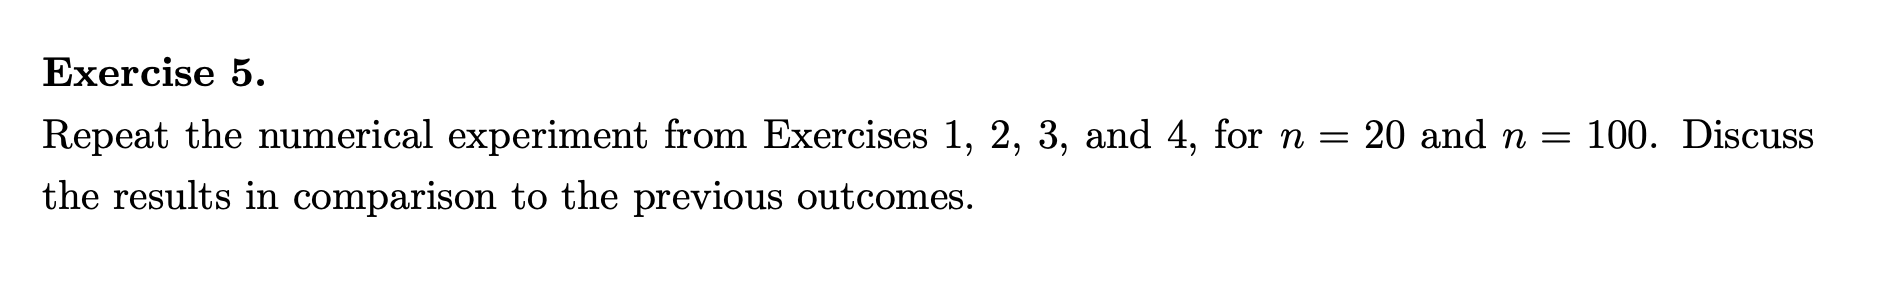